<a href="https://colab.research.google.com/github/jgracie52/CAP4630/blob/master/HW2_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup for Keras and MNIST Fashion Data Set

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


##Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

##Setup the Models

####Underfitted Model

#####Create the model

In [4]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.elu)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 4.2163 - acc: 0.2193 - val_loss: 4.1587 - val_acc: 0.2194
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 4.1578 - acc: 0.2174 - val_loss: 4.1580 - val_acc: 0.1676
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 4.1427 - acc: 0.1699 - val_loss: 4.1410 - val_acc: 0.1656
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 4.1347 - acc: 0.1722 - val_loss: 4.1334 - val_acc: 0.1695
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 4.1357 - acc: 0.1702 - val_loss: 4.1597 - val_acc: 0.1535
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss:

#####Display loss of model

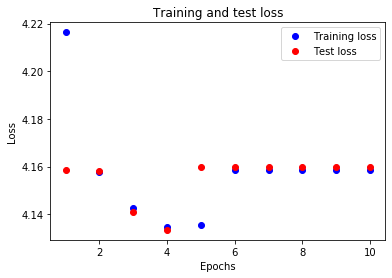

In [5]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#####Display accuracy of model

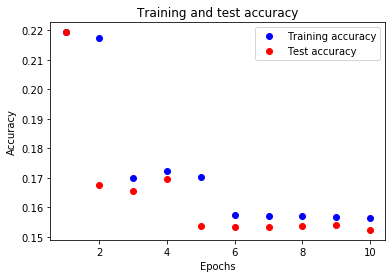

In [6]:
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

####Overfitted Model

#####Create the model

In [12]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(255, activation=tf.nn.elu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 15
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 8s 134us/sample - loss: 0.4871 - acc: 0.8254 - val_loss: 0.4443 - val_acc: 0.8391
Epoch 2/15
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3633 - acc: 0.8655 - val_loss: 0.3751 - val_acc: 0.8627
Epoch 3/15
60000/60000 [==============================] - 9s 144us/sample - loss: 0.3266 - acc: 0.8792 - val_loss: 0.3644 - val_acc: 0.8672
Epoch 4/15
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3052 - acc: 0.8857 - val_loss: 0.3834 - val_acc: 0.8562
Epoch 5/15
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2863 - acc: 0.8925 - val_loss: 0.3489 - val_acc: 0.8714
Epoch 6/15
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2733 - acc: 0.8960 - val_loss: 0.3398 - val_acc: 0.8815
Epoch 7/15
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2592 - acc: 0.9014 - val_l

#####Display loss of model

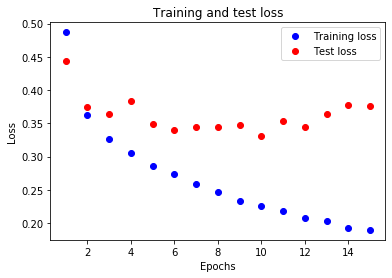

In [13]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#####Display accuracy of model

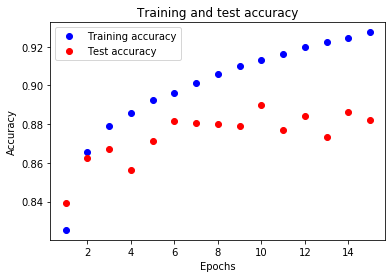

In [14]:
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

####Well fitted model

#####Create the model

In [9]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.elu),
    keras.layers.Dense(64, activation=tf.nn.leaky_relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.5269 - acc: 0.8095 - val_loss: 0.4171 - val_acc: 0.8489
Epoch 2/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.4010 - acc: 0.8537 - val_loss: 0.3952 - val_acc: 0.8542
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3598 - acc: 0.8690 - val_loss: 0.3916 - val_acc: 0.8546
Epoch 4/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3379 - acc: 0.8755 - val_loss: 0.3584 - val_acc: 0.8713
Epoch 5/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3205 - acc: 0.8811 - val_loss: 0.3450 - val_acc: 0.8755
Epoch 6/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3035 - acc: 0.8877 - val_loss: 0.3632 - val_acc: 0.8700
Epoch 7/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2919 - acc: 0.8905 - val_loss

#####Display loss of model

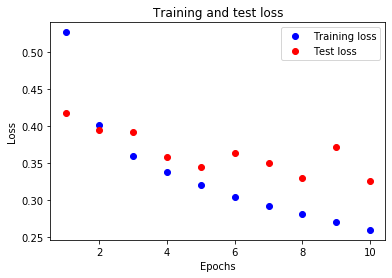

In [11]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#####Display accuracy of model

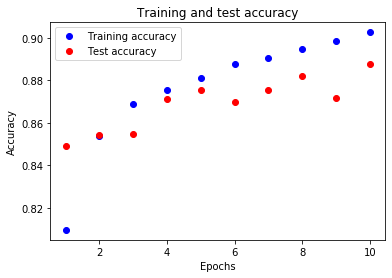

In [10]:
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()